# Heart Failure Prediction

### Import Modules and Data

In [69]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [47]:
# Importing the data
df = pd.read_csv('https://raw.githubusercontent.com/foukette/Heart_Failure_Prediction/main/heart_failure_clinical_records_dataset.csv')

# Explore the Data

In [48]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [49]:
df.shape

(299, 13)

In [50]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Columns

In [51]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

age : Age of patient.

anaemia : If the patient has decrease of red blood cells or hemoglobin. No = 0 , Yes = 1.

creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L).

diabetes : If the patient has diabetes. No = 0 , Yes = 1.

ejection_fraction : Percentage of blood leaving the heart at each contraction.

high_blood_pressure : If the patient has hypertension. No = 0 , Yes = 1.

platelets : Platelets in the blood (kiloplatelets/mL).

serum_creatinine : Level of serum creatinine in the blood (mg/dL).

serum_sodium : Level of serum sodium in the blood (mEq/L).

sex : Gender of patient. Woman = 0 , Man = 1

smoking : If the patient smokes or not. No = 0 , Yes = 1.

time : Follow-up period (days).

DEATH_EVENT : If the patient deceased during the follow-up period. No = 0 , Yes = 1.

### Check if there is null values

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [53]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Visualization

In [54]:
fig = px.pie(df, 
             names='DEATH_EVENT', 
             title='Distribution of Death Events in Patients',
             width=600, 
             height=400)
fig.show()

### Age analysis

In [55]:
# defining data
trace = go.Histogram(x=df['age'],nbinsx=40,histnorm='percent')
data = [trace]
# defining layout
layout = go.Layout(title="Age Distribution")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [56]:
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [57]:
# Distribution of AGE Vs DEATH_EVENT

fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly",
                   
                   
                  )
fig.show()

In [58]:
living = df[df["DEATH_EVENT"]==0]["age"]
deceased = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [living,deceased]
group_labels = ['Living', 'Deceased']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on death")
fig.show()

Before 70 years the survival rate is higher than that of deaths. After that is reversed

### ejection_fraction Analysis

In [59]:
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

### serum_creatinine Analysis

### serum_sodium analysis

### time analysis

# feature selection

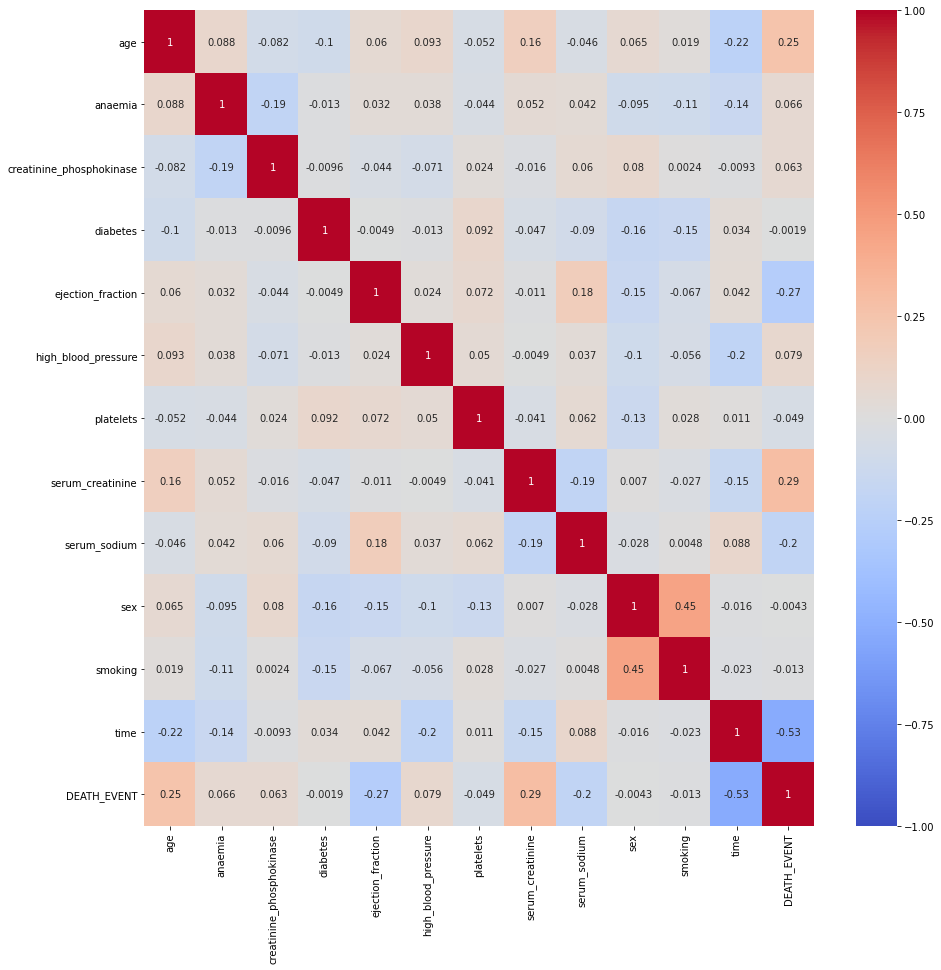

In [60]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [61]:
corr[abs(corr['DEATH_EVENT']) > 0.2]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

We will select the features with the highest correlation :
*   age
*   ejection_fraction
*   serum_creatinine
*   time





In [62]:
df_final = df.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking'],axis=1)

In [63]:
df_final

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1
...,...,...,...,...,...,...
294,62.0,38,1.1,143,270,0
295,55.0,38,1.2,139,271,0
296,45.0,60,0.8,138,278,0
297,45.0,38,1.4,140,280,0


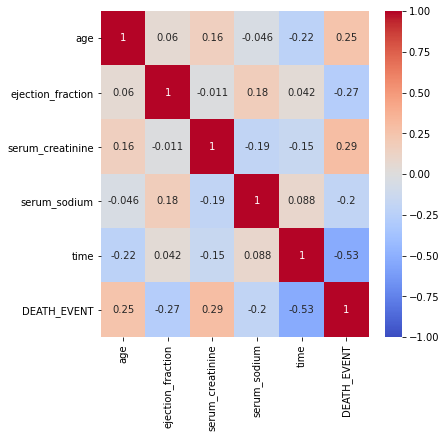

In [67]:
corr = df_final.corr()
ax, fig = plt.subplots(figsize=(6,6))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

# split dataset train and test

In [70]:
x=df_final.drop('DEATH_EVENT',axis=1)
y=df_final.DEATH_EVENT

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [77]:
print(x_train.shape)
print(x_test.shape)

(209, 5)
(90, 5)
